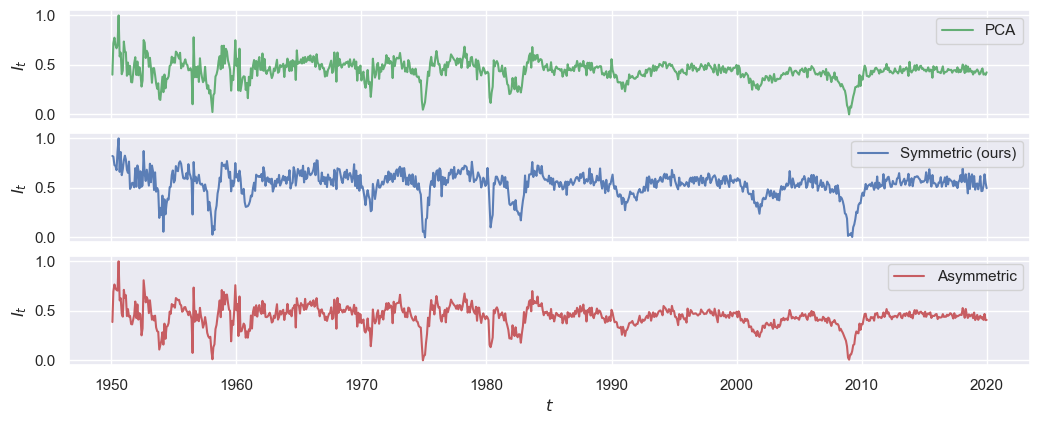

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import numpy as np
from Andreini_data.data import load_y
import matplotlib.pyplot as plt
import seaborn as sns

def normalized(a):
    return (a-a.min())/(a.max()-a.min())

sns.set()
y, mask, index, columns= load_y(daterange=['1950-01-01', '2024-01-01'])

pca = np.load('CI_filtered_pca.npy')
ours = np.load('CI_filtered_ours_3.npy')
asym = np.load('CI_filtered_assymetric_3.npy')

i_min = np.argwhere((index > '1950')).min()
i_max =  np.argwhere((index > '2020')).min()
ours = ours[i_min:i_max]
pca  = pca[i_min:i_max]
asym  = asym[i_min:i_max]


fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(10,4), sharex=True)

b =  0.0
ax1.plot(index[i_min:i_max],normalized(pca*-1 +b), c='C2', label='PCA', alpha=0.9)
#ax1.grid(False)

ax2.plot(index[i_min:i_max],normalized(ours), label='Symmetric (ours)', alpha=0.9)
ax3.plot(index[i_min:i_max],normalized(asym), label='Asymmetric', c='C3', alpha=0.9)
#ax2.grid(False)
#ax = plt.twinx()
fig.tight_layout(pad=0.5)
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_ylabel('$I_t$')
ax2.set_ylabel('$I_t$')
ax3.set_ylabel('$I_t$')

ax3.set_xlabel('$t$')
#ax.grid(False)
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
#fig.legend(lines, labels, loc='upper left')

Text(0.94, 1.0, 'Asymmetric')

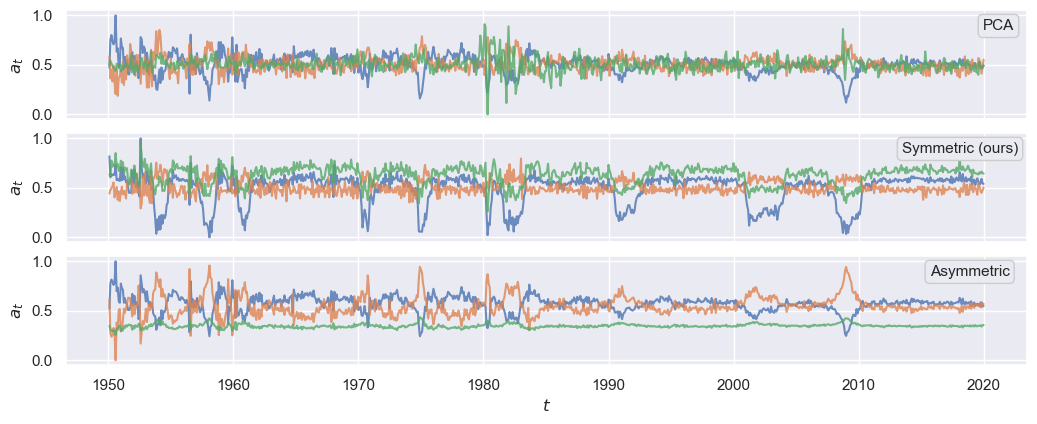

In [4]:
pca = np.load('state_filtered_pca.npy')
ours = np.load('state_filtered_ours.npy')
asym = np.load('state_filtered_asymmetric_2.npy')

i_min = np.argwhere((index > '1950')).min()
i_max =  np.argwhere((index > '2020')).min()
ours = ours[i_min:i_max]
pca  = pca[i_min:i_max]
asym  = asym[i_min:i_max]


fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(10,4), sharex=True)

b =  0.0
ax1.plot(index[i_min:i_max],normalized(pca*-1 +b), label='PCA', alpha=0.8)
#ax1.grid(False)
ax2.plot(index[i_min:i_max],normalized(ours), label='Symmetric (ours)', alpha=0.8)
ax3.plot(index[i_min:i_max],normalized(asym), label='Asymmetric', alpha=0.8)
#ax2.grid(False)
#ax = plt.twinx()
fig.tight_layout(pad=0.5)
ax1.set_ylabel('${a}_t$')
ax2.set_ylabel('${a}_t$')
ax3.set_ylabel('${a}_t$')

ax3.set_xlabel('$t$')
ax1.set_title('PCA', fontsize=11, x=1-0.03, y=1.0, pad=-14, bbox=dict(facecolor='#EAEAF2', alpha=1, edgecolor='0.8', boxstyle='round'))
ax2.set_title('Symmetric (ours)',fontsize=11, x=1-0.07, y=1.0, pad=-14, bbox=dict(facecolor='#EAEAF2', alpha=1, edgecolor='0.8', boxstyle='round'))
ax3.set_title('Asymmetric',fontsize=11, x=1-0.06, y=1.0, pad=-14, bbox=dict(facecolor='#EAEAF2', alpha=1, edgecolor='0.8', boxstyle='round'))


In [4]:
i = 140
mse_ours = np.load('mse_test_ours.npy')
mse_asym= np.load('mse_test_asymmetric.npy')
mse_pca= np.load('mse_test_pca.npy')
print(np.mean(mse_ours[:i]))
print(np.mean(mse_asym[:i]))
print(np.mean(mse_pca[:i]))

0.08197972200189688
0.09960640387288554
0.09631418347387036


In [5]:
import numpy as np
from scipy.stats import norm

def diebold_mariano_test(e1, e2, h=1, alpha=0.05, two_tailed=True):
    """
    Perform the Diebold-Mariano test to compare forecast accuracy between two models.

    Args:
        e1 (list or numpy array): Errors of model F.
        e2 (list or numpy array): Errors of model G.
        h (int): Forecast horizon (default: 1).
        alpha (float): Significance level (default: 0.05).
        two_tailed (bool): Use two-tailed test (default: True).

    Returns:
        float: Test statistic.
        float: P-value.
        bool: Whether to reject the null hypothesis.
    """
    n = len(e1)
    #d = np.square(e1) - np.square(e2)
    d = e1 - e2
    d_mean = np.mean(d)
    d_var = np.var(d)

    if n <= h:
        raise ValueError("Number of observations (n) should be greater than the forecast horizon (h).")

    dm_stat = d_mean / np.sqrt((d_var / n))
    p_value = 2 * (1 - norm.cdf(abs(dm_stat)))

    if not two_tailed:
        p_value /= 2

    reject_null = p_value < alpha

    return dm_stat, p_value, reject_null



dm_stat, p_value, reject_null = diebold_mariano_test(mse_ours[:i].mean(axis=1), mse_pca[:i].mean(axis=1), two_tailed=True)
print("Diebold-Mariano test statistic:", dm_stat)
print("P-value:", p_value)
print("Reject null hypothesis:", reject_null)

Diebold-Mariano test statistic: -6.527763916641041
P-value: 6.675882069373529e-11
Reject null hypothesis: True


In [27]:
i = 140
from forecast import saveForecastErrorPCA, saveForecastErrorAR1
saveForecastErrorPCA(mod=None, fn='pca.npy')

fc_mse_pca = np.load('pca.npy')
fc_mse_ours = np.load('symmetric2.npy')
fc_mse_asym= np.load('asymmetric.npy')
#fc_mse_pca= np.load('mse_test_pca.npy')
print(np.mean(fc_mse_ours[:i]))
print(np.mean(fc_mse_asym[:i]))
print(np.mean(fc_mse_pca[:i]))
dm_stat, p_value, reject_null = diebold_mariano_test(fc_mse_ours[:i], fc_mse_asym[:i], two_tailed=True)
print("Diebold-Mariano test statistic:", dm_stat)
print("P-value:", p_value)
print("Reject null hypothesis:", reject_null)
dm_stat, p_value, reject_null = diebold_mariano_test(fc_mse_ours[:i], fc_mse_pca[:i], two_tailed=True)
print("Diebold-Mariano test statistic:", dm_stat)
print("P-value:", p_value)
print("Reject null hypothesis:", reject_null)

(179, 3)
0.1078693602622375
0.11824672322479546
0.1152130282666412
Diebold-Mariano test statistic: -5.730180486266674
P-value: 1.0032383146452162e-08
Reject null hypothesis: True
Diebold-Mariano test statistic: -3.739911063462142
P-value: 0.00018408537635328237
Reject null hypothesis: True
